<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمایشگاه آماری: نمونه‌گیری و استنباط در خط تولید
</font>
</h1>


<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در دنیای امروز، علم آمار و احتمال نقش بسیار مهمی در تحلیل داده‌ها و تصمیم‌گیری‌های مبتنی بر داده ایفا می‌کند. از صنعت گرفته تا علوم پزشکی، اقتصاد، و حتی هوش مصنوعی، همه به نوعی به آمار وابسته هستند. در این تمرین، قصد داریم شما را با مفاهیم کلیدی آمار و احتمال آشنا کنیم و به شما یاد بدهیم که چگونه از این مفاهیم در تحلیل داده‌های واقعی استفاده کنید.


**هدف از تمرین:**

هدف اصلی این تمرین، آشنایی شما با مفاهیم آماری زیر است:

1. **روش‌های نمونه‌گیری:** یاد خواهید گرفت که چگونه از جمعیت کل، نمونه‌هایی استخراج کنید و تأثیر اندازه نمونه را بر نتایج آماری بررسی کنید.
2. **قضیه حد مرکزی (CLT):** خواهید دید که چرا میانگین نمونه‌ها به توزیع نرمال نزدیک می‌شود و این موضوع چقدر در تحلیل‌های آماری مهم است.
3. **قانون اعداد بزرگ (LLN):** متوجه خواهید شد که با افزایش اندازه نمونه، میانگین نمونه به میانگین جمعیت نزدیک می‌شود.
4. **بوت‌استرپ:** یاد خواهید گرفت که چگونه فاصله اطمینان را با استفاده از روش بوت‌استرپ محاسبه کنید.
5. **برآورد نقطه‌ای و فاصله‌ای:** نحوه برآورد میانگین و فاصله اطمینان برای پارامترهای جمعیت را یاد خواهید گرفت.
6. **بایاس نمونه و بایاس در انتخاب:** بررسی خواهید کرد که آیا نمونه‌گیری منجر به بایاس می‌شود یا خیر.



**شرح داده‌ها:**

داده‌هایی که در اختیار شما قرار داده شده‌اند، مربوط به **وزن قطعات تولید شده در یک خط تولید** هستند. این داده‌ها به صورت شبیه‌سازی شده تولید شده‌اند و از توزیع نرمال $ N(\mu=50, \sigma=5) $ پیروی می‌کنند. به عبارت دیگر:
- میانگین وزن قطعات تولید شده $ 50 $ گرم است.
- انحراف معیار وزن قطعات $ 5 $ گرم است.

همچنین، به داده‌ها **نویز** اضافه شده است تا شرایط واقعی‌تری شبیه‌سازی شود. این نویز از توزیع نرمال $ N(0, 2) $ تولید شده است.



این تمرین طراحی شده است تا شما را با مفاهیم آماری آشنا کند و به شما کمک کند که این مفاهیم را در یک سناریوی عملی به کار ببرید. داده‌هایی که در اختیار دارید، مربوط به وزن قطعات تولید شده در یک خط تولید هستند و شامل نویز هستند. با انجام این تمرین، مهارت‌های تحلیل داده و برنامه‌نویسی خود را تقویت خواهید کرد.

</font>
</p>
</div>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
فراخوانی کتابخانه‌های مورد نیاز.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<div dir="rtl">
در این مرحله شما می‌بایست داده‌های موجود در مسیر `data` به نام `manufacturing_weights.csv` را فراخوانی کرده و در یک متغیر به نام `data_df` ذخیره کنید.

از این اطلاعات و مقادیر برای عملیات‌های بعدی استفاده خواهیم کرد.
</div>
</font>
</p>


In [2]:
# Load the dataset
data_df = pd.read_csv('manufacturing_weights.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data_df.head())

First few rows of the dataset:


,Weight
0,51.12
1,48.69
2,52.04
3,57.83
4,51.22


<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خلاصه آماری
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این مرحله شما می‌بایست خلاصه اطلاعات آماری این مجموعه داده را از قبیل «میانگین»، «میانه»، و«مد» و ... با استفاده از متد <code>describe</code> را پیدا به دست آورید و در متغیر <code>summary_statistics</code> ذخیره کنید
متغیر مورد نظر باید حاوی یک دیتافریم به مشابه جدول زیر باشد:
</div>
<div dir="center">

| | Weight|
-----|-----|
count | 1234|
mean | 1234|
mean | 1234|
std	| 1234|
min	| 1234|
25%	| 1234|
50%	| 1234|
75%	| 1234|
max	| 1234|

</div>

<div dir="rtl">
(این اعداد واقعی نیستند صرفا جهت مثال هستند.)
</font>
</p>


In [3]:
# Summary statistics
summary_statistics = data_df.describe()

print("\nSummary statistics of the dataset:")
display(summary_statistics)


Summary statistics of the dataset:


,Weight
count,10000.000000
mean,50.011355
std,5.386041
min,28.030000
25%,46.380000
50%,50.000000
75%,53.610000
max,71.610000


<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
استخراج نمونه‌ها و محاسبه میانگین نمونه‌ها
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش، شما با روش‌های نمونه‌گیری آشنا خواهید شد و یاد خواهید گرفت که چگونه از جمعیت کل داده‌ها، نمونه‌هایی با اندازه‌های مختلف استخراج کنید. هدف اصلی این است که تأثیر اندازه نمونه بر نتایج آماری (مانند میانگین) را بررسی کنید و ببینید که آیا نمونه‌گیری منجر به بایاس می‌شود یا خیر.<br>
    
**مراحل کار:**<br>
    
1. **تعیین اندازه‌های نمونه:**
   - در ابتدا، سه اندازه نمونه مختلف ($ n=30 $, $ n=50 $, $ n=100 $) تعیین می‌کنیم. این اندازه‌ها به ما کمک می‌کنند که تأثیر اندازه نمونه بر نتایج آماری را مقایسه کنیم.
2. **استخراج نمونه‌ها:**
   - با استفاده از متد `sample` در کتابخانه `pandas`، از ستون `Weight` داده‌ها نمونه‌هایی با اندازه‌های مشخص شده استخراج می‌کنیم.
   - نمونه‌گیری به صورت تصادفی و بدون جایگذاری (`replace=False`) انجام می‌شود تا هر نمونه شامل داده‌های منحصر به فرد باشد.
3. **محاسبه میانگین نمونه‌ها:**
   - پس از استخراج نمونه‌ها، میانگین وزن قطعات در هر نمونه را محاسبه می‌کنیم.
   - این میانگین‌ها به ما کمک می‌کنند که ببینیم آیا با افزایش اندازه نمونه، میانگین نمونه به میانگین جمعیت نزدیک‌تر می‌شود یا خیر.
<br>
<strong>نتیجه مورد انتظار:<strong><br>
پس از اجرای این بخش، شما باید خروجی مشابه زیر را مشاهده کنید:
</div>


```
Sample means for different sample sizes:
Sample size 30: Mean = 49.87
Sample size 50: Mean = 50.12
Sample size 100: Mean = 50.03
```

<div dir="rtl">
(این اعداد واقعی نیستند و صرفاً جهت مثال هستند.)
<br>
<strong>نتیجه این مرحله:</strong><br>
پس از اجرای این بخش، شما:<br>

- نمونه‌هایی با اندازه‌های مختلف استخراج کرده‌اید.
- میانگین وزن قطعات در هر نمونه را محاسبه کرده‌اید.
- تأثیر اندازه نمونه بر نتایج آماری را بررسی کرده‌اید.<br>
این اطلاعات به شما کمک می‌کند که در مراحل بعدی، مفاهیمی مانند قضیه حد مرکزی (CLT) و قانون اعداد بزرگ (LLN) را بهتر درک کنید.
</font>
</p>


In [4]:
# Define sample sizes
sample_sizes = [30, 50, 100]

# Extract samples
samples = {}
for n in sample_sizes:
    samples[n] = data_df['Weight'].sample(n=n, replace=False).values

# Saving the Sampling Means
sample_means_sampling = {}

# Display sample means
print("Sample means for different sample sizes:")
for n, sample in samples.items():
    sample_means_sampling[f"sample_{n}_mean"] = np.mean(sample)
    print(f"Sample size {n}: Mean = {np.mean(sample):.2f}")

Sample means for different sample sizes:
Sample size 30: Mean = 50.38
Sample size 50: Mean = 51.35
Sample size 100: Mean = 50.28


In [5]:
for key, value in sample_means_sampling.items():
    print(f"{key}: {value}")

sample_30_mean: 50.38133333333332
sample_50_mean: 51.3538
sample_100_mean: 50.2783


<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی قضیه حد مرکزی (CLT) با استفاده از توزیع میانگین نمونه‌ها
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش، شما با یکی از مهم‌ترین مفاهیم آماری، <strong>قضیه حد مرکزی (Central Limit Theorem - CLT)</strong>، آشنا خواهید شد. هدف اصلی این است که ببینید چگونه توزیع میانگین نمونه‌ها به یک توزیع نرمال نزدیک می‌شود، حتی اگر توزیع جمعیت اولیه نرمال نباشد. این مفهوم در تحلیل‌های آماری و استنباط‌های مبتنی بر نمونه بسیار مهم است.<br>
<strong>مراحل کار:</strong>

1. **تولید نمونه‌ها:**
   - ابتدا باید تعداد $ 1000 $ نمونه از داده‌ها استخراج کنید. هر نمونه شامل $ 30 $ داده است.
   - برای استخراج نمونه‌ها، از ستون <code>Weight</code> داده‌ها استفاده کنید و نمونه‌گیری را به صورت تصادفی و بدون جایگذاری (<code>replace=False</code>) انجام دهید.
   - برای این کار، می‌توانید از متد <code>sample</code> در کتابخانه <code>pandas</code> استفاده کنید.

2. **محاسبه میانگین نمونه‌ها:**
   - برای هر نمونه، میانگین وزن قطعات را محاسبه کنید.
   - این میانگین‌ها را در یک لیست ذخیره کنید. این لیست نشان‌دهنده توزیع میانگین نمونه‌ها است.

3. **رسم توزیع میانگین نمونه‌ها:**
   - پس از محاسبه میانگین نمونه‌ها، توزیع آن‌ها را با استفاده از یک هیستوگرام رسم کنید.
   - برای نمایش دقیق‌تر، منحنی چگالی احتمال (KDE) را نیز روی هیستوگرام اضافه کنید.
   - برای رسم نمودار، می‌توانید از کتابخانه‌های <code>matplotlib</code> و <code>seaborn</code> استفاده کنید.

4. **بررسی نتایج:**
   - نمودار رسم شده را بررسی کنید و ببینید که آیا توزیع میانگین نمونه‌ها به یک توزیع نرمال نزدیک می‌شود یا خیر.
   - این نتیجه مستقیماً ناشی از قضیه حد مرکزی است.

<details class="green">
<summary>
راهنمایی برای پیاده‌سازی
</summary>


1. **تعریف متغیرها:**
   - ابتدا دو متغیر تعریف کنید:
     - `num_samples`: تعداد نمونه‌ها که برابر با $ 1000 $ است.
     - `sample_size`: اندازه هر نمونه که برابر با $ 30 $ است.

2. **استخراج نمونه‌ها و محاسبه میانگین:**
   - یک حلقه `for` بنویسید که $ 1000 $ بار تکرار شود.
   - در هر تکرار، یک نمونه از داده‌ها استخراج کنید و میانگین آن را محاسبه کنید.
   - میانگین‌های محاسبه شده را در یک لیست ذخیره کنید.

3. **رسم نمودار:**
   - از تابع <code>sns.histplot<code> برای رسم هیستوگرام استفاده کنید.
   - پارامتر <code>kde=True</code> را تنظیم کنید تا منحنی چگالی احتمال نیز نمایش داده شود.
   - عنوان نمودار را به صورت "توزیع میانگین نمونه‌ها (قضیه حد مرکزی)" تنظیم کنید.
   - محور افقی را به عنوان "میانگین نمونه" و محور عمودی را به عنوان "فرکانس" برچسب‌گذاری کنید.

</details>

**نتیجه مورد انتظار:**

پس از اجرای کد، شما باید یک نمودار مشابه زیر را مشاهده کنید:

![تصویر نمودار](picture//CLT%20plot%20example.png?text=Distribution+of+Sample+Means)

(این تصویر صرفاً جهت مثال است و نمودار واقعی ممکن است متفاوت باشد.)

- نمودار نشان می‌دهد که توزیع میانگین نمونه‌ها به یک توزیع نرمال نزدیک می‌شود.
- این نتیجه مستقیماً ناشی از قضیه حد مرکزی است.


</font>
</p>




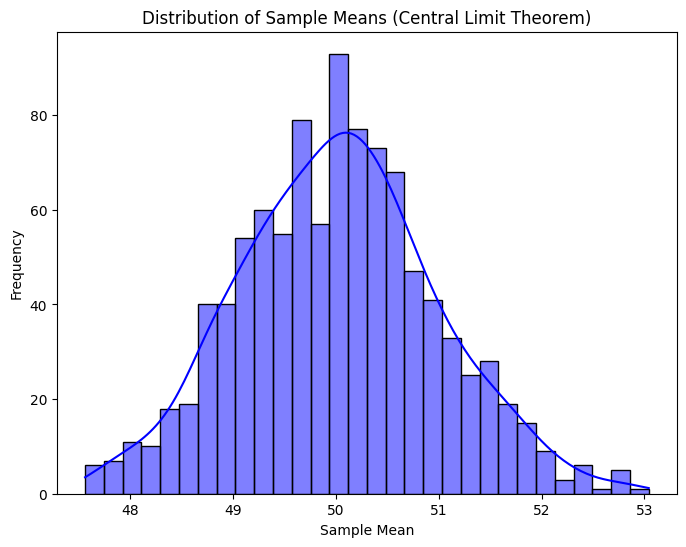

In [6]:
# Number of samples to generate
num_samples = 1000
sample_size = 30

# Generate sample means
sample_means = []
for _ in range(num_samples):
    sample = data_df['Weight'].sample(n=sample_size, replace=False).values
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means
plt.figure(figsize=(8, 6))
sns.histplot(sample_means, kde=True, bins=30, color='blue')
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محاسبه فاصله اطمینان با استفاده از روش بوت‌استرپ
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>


در این بخش، شما با یکی از روش‌های قدرتمند در آمار، <strong>بوت‌استرپ (Bootstrap)</strong>، آشنا خواهید شد. هدف اصلی این است که یاد بگیرید چگونه می‌توانید فاصله اطمینان برای پارامترهای جمعیت (مانند میانگین) را با استفاده از نمونه‌های تصادفی محاسبه کنید. این روش به ویژه زمانی کاربردی است که توزیع داده‌ها ناشناخته یا غیرنرمال باشد.


**مراحل کار:**

1. **تعریف پارامترهای بوت‌استرپ:**
   - ابتدا تعداد نمونه‌های بوت‌استرپ ($ 1000 $) و اندازه هر نمونه ($ 30 $) را تعیین کنید.
   - در روش بوت‌استرپ، نمونه‌گیری به صورت تصادفی و با جایگذاری (`replace=True`) انجام می‌شود. این بدان معناست که یک داده می‌تواند چندین بار در یک نمونه ظاهر شود.

2. **اجرای بوت‌استرپ:**
   - $ 1000 $ نمونه از داده‌ها استخراج کنید. هر نمونه شامل $ 30 $ داده است.
   - برای هر نمونه، میانگین وزن قطعات را محاسبه کنید و آن را در یک لیست ذخیره کنید. این لیست نشان‌دهنده توزیع میانگین نمونه‌ها در روش بوت‌استرپ است.

3. **محاسبه فاصله اطمینان:**
   - پس از محاسبه میانگین نمونه‌ها، فاصله اطمینان $ 95\% $ را با استفاده از چندک‌های $ 2.5\% $ و $ 97.5\% $ محاسبه کنید.
   - این فاصله اطمینان نشان‌دهنده بازه‌ای است که با احتمال $ 95\% $، میانگین واقعی جمعیت در آن قرار دارد.

4. **نمایش نتایج:**
   - فاصله اطمینان محاسبه شده را چاپ کنید و آن را تفسیر کنید.

<details class="green">
<summary>
راهنمایی برای پیاده‌سازی
</summary>

1. **تعریف متغیرها:**
   - ابتدا دو متغیر تعریف کنید:
     - <code>bootstrap_samples</code>: تعداد نمونه‌های بوت‌استرپ که برابر با $ 1000 $ است.
     - <code>sample_size</code>: اندازه هر نمونه که برابر با $ 30 $ است.

2. **اجرای بوت‌استرپ:**
   - یک حلقه <code>for</code> بنویسید که $ 1000 $ بار تکرار شود.
   - در هر تکرار، یک نمونه از داده‌ها استخراج کنید. برای این کار، از تابع <code>np.random.choice</code> استفاده کنید و پارامتر <code>replace=True</code> را تنظیم کنید.
   - میانگین هر نمونه را محاسبه کنید و آن را در یک لیست ذخیره کنید.

3. **محاسبه فاصله اطمینان:**
   - از تابع <code>np.percentile</code> برای محاسبه چندک‌های $ 2.5\% $ و $ 97.5\% $ استفاده کنید.
   - این مقادیر نشان‌دهنده حدود فاصله اطمینان $ 95\% $ هستند.

4. **نمایش نتایج:**
   - فاصله اطمینان را با استفاده از دستور <code>print</code> چاپ کنید.

</details>


**نتیجه مورد انتظار:**

پس از اجرای کد، شما باید یک خروجی مشابه زیر را مشاهده کنید:

</div>

```
95% Confidence Interval for the mean weight: [48.12, 51.34]
```

<div dir="rtl">


(این اعداد صرفاً جهت مثال هستند و مقادیر واقعی ممکن است متفاوت باشند.)

- این فاصله اطمینان نشان می‌دهد که با احتمال $ 95\% $، میانگین واقعی وزن قطعات در این بازه قرار دارد.


</font>
</p>



In [1]:
# Bootstrap parameters
bootstrap_samples = 1000
sample_size = 30

# Perform bootstrap
bootstrap_means = []
for _ in range(bootstrap_samples):
    bootstrap_sample = np.random.choice(data_df['Weight'], size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate confidence interval
bootstrap_CI  = np.percentile(bootstrap_means, [2.5, 97.5])

# Display results
print(f"95% Confidence Interval for the mean weight: {bootstrap_CI}")

NameError: name 'np' is not defined

<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی قانون اعداد بزرگ (LLN) با استفاده از همگرایی میانگین نمونه‌ها
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>



در این بخش، شما با یکی از بنیادی‌ترین مفاهیم آماری، <strong>قانون اعداد بزرگ (Law of Large Numbers - LLN)</strong>، آشنا خواهید شد. هدف اصلی این است که ببینید چگونه با افزایش اندازه نمونه، میانگین نمونه به میانگین واقعی جمعیت نزدیک‌تر می‌شود. این قانون پایه‌ای در تحلیل‌های آماری است و به ما کمک می‌کند که دقت نتایج را با افزایش حجم داده‌ها ارزیابی کنیم.

**مراحل کار:**

1. **تعیین اندازه‌های نمونه:**
   - ابتدا چند اندازه نمونه مختلف تعیین کنید. برای این مثال، اندازه‌های نمونه شامل $ 10, 50, 100, 500, 1000 $ هستند.
   - این اندازه‌ها به ما کمک می‌کنند که تأثیر افزایش حجم نمونه بر میانگین نمونه را بررسی کنیم.

2. **استخراج نمونه‌ها و محاسبه میانگین:**
   - برای هر اندازه نمونه، یک نمونه از داده‌ها استخراج کنید و میانگین وزن قطعات را محاسبه کنید.
   - این میانگین‌ها را در یک لیست ذخیره کنید. این لیست نشان‌دهنده میانگین نمونه‌ها برای اندازه‌های مختلف است.

3. **رسم نمودار:**
   - پس از محاسبه میانگین نمونه‌ها، یک نمودار خطی رسم کنید که نشان دهد میانگین نمونه‌ها چگونه با افزایش اندازه نمونه به میانگین واقعی جمعیت نزدیک می‌شوند.
   - برای مقایسه، میانگین واقعی جمعیت را به صورت یک خط افقی قرمز (<code>axhline</code>) روی نمودار نمایش دهید.

4. **بررسی نتایج:**
   - نمودار رسم شده را بررسی کنید و ببینید که آیا میانگین نمونه‌ها با افزایش اندازه نمونه به میانگین واقعی جمعیت نزدیک می‌شود یا خیر.
   - این نتیجه مستقیماً ناشی از قانون اعداد بزرگ است.

<details class="green">
<summary>
راهنمایی برای پیاده‌سازی
</summary>

1. **تعریف اندازه‌های نمونه:**
   - یک لیست شامل اندازه‌های نمونه ($ 10, 50, 100, 500, 1000 $) تعریف کنید.

2. **استخراج نمونه‌ها و محاسبه میانگین:**
   - یک حلقه <code>for</code> بنویسید که برای هر اندازه نمونه، یک نمونه از داده‌ها استخراج کند.
   - برای استخراج نمونه‌ها، از ستون <code>Weight</code> داده‌ها استفاده کنید و نمونه‌گیری را به صورت تصادفی و بدون جایگذاری (<code>replace=False</code>) انجام دهید.
   - میانگین هر نمونه را محاسبه کنید و آن را در یک لیست ذخیره کنید.

3. **رسم نمودار:**
   - از تابع <code>plt.plot</code> برای رسم میانگین نمونه‌ها استفاده کنید.
   - برای نمایش میانگین واقعی جمعیت، از تابع <code>plt.axhline</code> استفاده کنید و یک خط افقی قرمز رسم کنید.
   - عنوان نمودار را به صورت «قانون اعداد بزرگ» تنظیم کنید.
   - محور افقی را به عنوان «اندازه نمونه» و محور عمودی را به عنوان «میانگین نمونه» برچسب‌گذاری کنید.
   - از تابع <code>plt.legend</code> برای اضافه کردن راهنما به نمودار استفاده کنید.

4. **نمایش نتایج:**
   - نمودار را با استفاده از دستور <code>plt.show()</code> نمایش دهید.

</details>

**نتیجه مورد انتظار:**

پس از اجرای کد، شما باید یک نمودار مشابه زیر را مشاهده کنید:

![تصویر نمودار](picture//Law%20of%20Large%20number%20plot%20example%20practice.png?text=Law+of+Large+Numbers)

(این تصویر صرفاً جهت مثال است و نمودار واقعی ممکن است متفاوت باشد.)

- نمودار نشان می‌دهد که با افزایش اندازه نمونه، میانگین نمونه‌ها به میانگین واقعی جمعیت (خط قرمز) نزدیک‌تر می‌شود.
- این نتیجه مستقیماً ناشی از قانون اعداد بزرگ است.
</font>
</p>

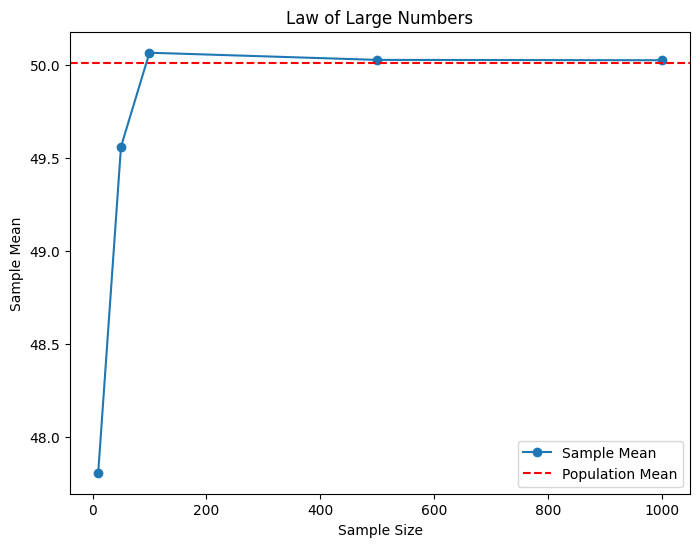

In [16]:
# Law of Large Numbers
sample_sizes = [10, 50, 100, 500, 1000]
sample_means = []

for n in sample_sizes:
    sample = data_df['Weight'].sample(n=n, replace=False).values
    sample_means.append(np.mean(sample))

# Plot the convergence of sample means to population mean
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, sample_means, marker='o', label="Sample Mean")
plt.axhline(y=data_df['Weight'].mean(), color='red', linestyle='--', label="Population Mean")
plt.title("Law of Large Numbers")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.legend()
plt.show()

<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محاسبه برآورد نقطه‌ای و فاصله اطمینان با استفاده از توزیع t-Student
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش، شما با دو مفهوم کلیدی در آمار آشنا خواهید شد: <strong>برآورد نقطه‌ای</strong> و <strong>برآورد فاصله‌ای</strong>. هدف اصلی این است که یاد بگیرید چگونه می‌توانید میانگین جمعیت را با استفاده از نمونه‌ها تخمین بزنید و یک بازه اطمینان برای آن محاسبه کنید. این مفاهیم در تحلیل‌های آماری و تصمیم‌گیری‌های مبتنی بر داده بسیار مهم هستند.<br>
<strong>مراحل کار:</strong>

1. **برآورد نقطه‌ای (Point Estimate):**
   - برآورد نقطه‌ای به معنای استفاده از یک مقدار واحد (مانند میانگین نمونه) برای تخمین پارامتر جمعیت است.
   - در اینجا، میانگین نمونه را به عنوان برآورد نقطه‌ای برای میانگین جمعیت محاسبه می‌کنیم.

2. **محاسبه خطای استاندارد (Standard Error):**
   - خطای استاندارد نشان‌دهنده عدم قطعیت در تخمین میانگین است.
   - برای محاسبه خطای استاندارد، از انحراف معیار نمونه ($ s $) و اندازه نمونه ($ n $) استفاده می‌کنیم.

3. **محاسبه حاشیه خطا (Margin of Error):**
   - حاشیه خطا نشان‌دهنده محدوده‌ای است که میانگین واقعی جمعیت با احتمال مشخصی در آن قرار دارد.
   - برای محاسبه حاشیه خطا، از توزیع t-Student استفاده می‌کنیم. این توزیع به ویژه زمانی کاربردی است که اندازه نمونه کوچک باشد و واریانس جمعیت ناشناخته باشد.

4. **محاسبه فاصله اطمینان (Confidence Interval):**
   - فاصله اطمینان با استفاده از میانگین نمونه و حاشیه خطا محاسبه می‌شود.
   - این بازه نشان‌دهنده محدوده‌ای است که با احتمال مشخصی (مانند $ 95\% $)، میانگین واقعی جمعیت در آن قرار دارد.

5. **نمایش نتایج:**
   - برآورد نقطه‌ای و فاصله اطمینان را چاپ کنید و آن‌ها را تفسیر کنید.

<details class="green">
<summary>
راهنمایی برای پیاده‌سازی
</summary>

1. **برآورد نقطه‌ای:**
   - میانگین نمونه را با استفاده از تابع <code>np.mean</code> محاسبه کنید.
   - این مقدار به عنوان برآورد نقطه‌ای برای میانگین جمعیت در نظر گرفته می‌شود.

2. **محاسبه خطای استاندارد:**
   - انحراف معیار نمونه را با استفاده از تابع <code>np.std</code> محاسبه کنید. پارامتر <code>ddof=1<code> را تنظیم کنید تا انحراف معیار نمونه (نه جمعیت) محاسبه شود.
   - خطای استاندارد را با تقسیم انحراف معیار نمونه بر ریشه دوم اندازه نمونه محاسبه کنید.

3. **محاسبه حاشیه خطا:**
   - از تابع <code>t.ppf</code> در کتابخانه <code>scipy.stats</code> برای محاسبه مقدار بحرانی توزیع t-Student استفاده کنید.
   - درجه آزادی (<code>df</code>) برابر با $ n-1 $ است، که $ n $ اندازه نمونه است.
   - حاشیه خطا را با ضرب مقدار بحرانی در خطای استاندارد محاسبه کنید.

4. **محاسبه فاصله اطمینان:**
   - فاصله اطمینان را با استفاده از فرمول زیر محاسبه کنید:
     $$
     \text{Confidence Interval} = (\text{Sample Mean} - \text{Margin of Error}, \text{Sample Mean} + \text{Margin of Error})
     $$

5. **نمایش نتایج:**
   - برآورد نقطه‌ای و فاصله اطمینان را با استفاده از دستور <code>print</code> چاپ کنید.
   - متن چاپ شده باید مشابه زیر باشد:
     ```
     Point Estimate (Sample Mean): 49.87
     95% Confidence Interval: (48.12, 51.34)
     ```
</details>

<strong>نتیجه مورد انتظار:</strong><br>
پس از اجرای کد، شما باید یک خروجی مشابه زیر را مشاهده کنید:
</div>

```
Point Estimate (Sample Mean): 49.87
95% Confidence Interval: (48.12, 51.34)
```

<div dir="rtl">

(این اعداد صرفاً جهت مثال هستند و مقادیر واقعی ممکن است متفاوت باشند.)

- برآورد نقطه‌ای نشان‌دهنده تخمین میانگین جمعیت است.
- فاصله اطمینان نشان می‌دهد که با احتمال $ 95\% $، میانگین واقعی جمعیت در این بازه قرار دارد.

</div>
</font>
</p>

In [11]:
from scipy.stats import t

# Point estimate (sample mean)
sample_mean = np.mean(samples[30])

# Standard error
std_error = np.std(samples[30], ddof=1) / np.sqrt(len(samples[30]))

# Margin of error
margin_of_error = t.ppf(0.975, df=len(samples[30])-1) * std_error

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Display results
print(f"Point Estimate (Sample Mean): {sample_mean:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")

Point Estimate (Sample Mean): 50.38
95% Confidence Interval: (np.float64(48.97817348186674), np.float64(51.784493184799906))


<div dir="rtl">
    <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی بایاس نمونه‌گیری و مقایسه میانگین نمونه‌ها با میانگین جمعیت
</font>
</h2>
</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>


در این بخش، شما با مفهوم **بایاس نمونه‌گیری (Sampling Bias)** آشنا خواهید شد. هدف اصلی این است که یاد بگیرید چگونه می‌توانید بررسی کنید که آیا نمونه‌گیری منجر به بایاس (خطای سیستماتیک) در تخمین پارامترهای جمعیت می‌شود یا خیر. این مفهوم در تحلیل داده‌ها بسیار مهم است، زیرا بایاس می‌تواند منجر به نتایج غلط و تصمیم‌گیری‌های نادرست شود.



**مراحل کار:**

1. **محاسبه میانگین جمعیت:**
   - ابتدا میانگین وزن قطعات در کل جمعیت را محاسبه کنید. این مقدار به عنوان مرجع برای مقایسه استفاده می‌شود.

2. **محاسبه میانگین نمونه‌ها:**
   - برای هر نمونه استخراج شده در مراحل قبل، میانگین وزن قطعات را محاسبه کنید.
   - این میانگین‌ها نشان‌دهنده تخمین‌های مختلف برای میانگین جمعیت هستند.

3. **محاسبه بایاس:**
   - برای هر نمونه، اختلاف بین میانگین نمونه و میانگین جمعیت را محاسبه کنید. این اختلاف نشان‌دهنده میزان بایاس است.
   - برای سادگی، از قدر مطلق اختلاف استفاده کنید تا میزان انحراف بدون در نظر گرفتن جهت مشخص شود.

4. **نمایش نتایج:**
   - بایاس محاسبه شده برای هر نمونه را چاپ کنید و آن را تفسیر کنید.

<details class="green">
<summary>
راهنمایی برای پیاده‌سازی
</summary>

1. **محاسبه میانگین جمعیت:**
   - از ستون `Weight` داده‌ها استفاده کنید و میانگین جمعیت را با استفاده از تابع `mean` محاسبه کنید.
   - این مقدار را در متغیر `population_mean` ذخیره کنید.

2. **محاسبه میانگین نمونه‌ها:**
   - از لیست یا دیکشنری نمونه‌های استخراج شده در مراحل قبل استفاده کنید.
   - برای هر نمونه، میانگین وزن قطعات را با استفاده از تابع `np.mean` محاسبه کنید.
   - این میانگین‌ها را در یک لیست ذخیره کنید.

3. **محاسبه بایاس:**
   - برای هر نمونه، اختلاف بین میانگین نمونه و میانگین جمعیت را محاسبه کنید.
   - برای محاسبه قدر مطلق اختلاف، از تابع `abs` استفاده کنید.
   - نتایج را در یک دیکشنری ذخیره کنید که کلیدها اندازه نمونه‌ها و مقادیر آن‌ها میزان بایاس هستند.


</details>

**نتیجه مورد انتظار:**

پس از اجرای کد، شما باید یک خروجی مشابه زیر را مشاهده کنید:

</font>
</p>

<div dir="ltr">

```
Bias in sample means compared to population mean:
Sample size 30: Bias = 0.12
Sample size 50: Bias = 0.08
Sample size 100: Bias = 0.03
```

</div>

<div dir="rtl">
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>

(این اعداد صرفاً جهت مثال هستند و مقادیر واقعی ممکن است متفاوت باشند.)

- این نتایج نشان می‌دهند که با افزایش اندازه نمونه، میزان بایاس کاهش می‌یابد.
- اگر بایاس برای تمام نمونه‌ها نزدیک به صفر باشد، می‌توان نتیجه گرفت که نمونه‌گیری بدون بایاس انجام شده است.

</font>
</p>

In [12]:
# Check for sampling bias
population_mean = data_df['Weight'].mean()
# Use the keys available in the samples dictionary
sample_means = [np.mean(samples[n]) for n in samples.keys()]

# Compare sample means to population mean
bias_results = {n: abs(sample_mean - population_mean) for n, sample_mean in zip(samples.keys(), sample_means)}

# Display results
print("Bias in sample means compared to population mean:")
for n, bias in bias_results.items():
    print(f"Sample size {n}: Bias = {bias:.2f}")

Bias in sample means compared to population mean:
Sample size 30: Bias = 0.37
Sample size 50: Bias = 1.34
Sample size 100: Bias = 0.27


<div dir="rtl">  
    <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
        <font face="vazir" size=3>
          در این مرحله تمام اطلاعات مفید و تقریبا پایداری که از پردازش‌های فوق کشف کردیم را در قالب یک دیتافریم ذخیره می‌کنیم
        </font>
    </p>
</div>

In [13]:
submission = {
    "metric": [
        "sample_mean_30",
        "sample_mean_50",
        "sample_mean_100",
        "bootstrap_CI_lower",
        "bootstrap_CI_upper",
        "population_mean",
    ],
    "value": [
        sample_means_sampling["sample_30_mean"],
        sample_means_sampling["sample_50_mean"],
        sample_means_sampling["sample_100_mean"],
        bootstrap_CI[0],
        bootstrap_CI[1],
        summary_statistics.loc['mean']['Weight'],
    ]
}

submission_df = pd.DataFrame(submission)

submission_df

,metric,value
0,sample_mean_30,50.381333
1,sample_mean_50,51.353800
2,sample_mean_100,50.278300
3,bootstrap_CI_lower,48.036083
4,bootstrap_CI_upper,51.987708
5,population_mean,50.011355


<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission_df.to_csv('submission.csv', index=False)

file_names = [ 'submission.csv', 'Data_Espersso.ipynb']
compress(file_names)

File Paths:
['submission.csv', 'Statistical_laboratory_sampling_and_inference_in_the_production_line_final.ipynb']


<div dir="rtl">  
    <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
        <font face="vazir" size=3>
          حال که توانستیم مراحل به ترتیب اجرا کنیم و به مسئله پاسخ دهیم می‌توانیم پارامترها را تغییر دهیم و نتیجه حاصله از این تغییرات را مشاهده کنیم.
        </font>
    </p>
</div>